In [1]:
library(ggplot2)
library(dplyr)
library(stringr)
library(tidyverse)
library(RColorBrewer)
# get Dark2 colors and add 2 more distinct dark colors if needed
dark2_colors <- brewer.pal(8, "Dark2")
extended_colors <- c(dark2_colors, "#8B4513", "#2F4F4F",dark2_colors[1:2])

Warning message:
“package ‘dplyr’ was built under R version 4.3.3”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“package ‘stringr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘readr’ was built under R version 4.3.3”
Warning message:
“package ‘purrr’ was built under R version 4.3.3”
Warning message:
“package ‘forcats’ was built under R version 4.3.3”
Warning message:
“package ‘lubridate’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     

In [2]:
df<-read.csv('MSD - Sheet1.csv')
head(df)

,experiment,well,X,dilution,replicate,sample_type,X.1,IFN.Y,IL.10,IL.12p70,IL.13,IL.1,IL.2,IL.4,IL.6,IL.8,TNF.A
,<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,NA,15.63260,1.1050229,9.274667,1.7237740,202.8576,10.39938,7.7698813,5.801105,344.1446
2,EXP-01523_W4,EXP-01523_w3-Samples-BR1010-B5 4...fcs,NA,1,1,Sample,NA,2073.3512,38.93357,3.2723319,13.749999,1.4164808,1414.7747,40.42106,6.1995624,13.492901,1719.1866
3,EXP-01523_W4,EXP-01523_w3-Samples-BR1018-C5 4.fcs,NA,1,1,Sample,NA,624.0335,11.42438,2.7598916,12.216513,1.4164808,479.8859,16.83432,4.7262735,14.058233,466.0104
4,EXP-01523_W4,EXP-01523_w3-Samples-BR1019-D5 4...fcs,NA,1,1,Sample,NA,917.1467,25.78836,3.1472043,13.925416,1.2958884,696.1807,29.67957,4.5504113,6.269492,636.0489
5,EXP-01523_W4,EXP-01523_w3-Samples-BR1023-E5 4.fcs,NA,1,1,Sample,NA,2979.1112,1620.67983,0.3209345,24.310702,0.9596624,4400.0964,85.32608,29.5222973,7.451939,1867.8303
6,EXP-01523_W4,EXP-01523_w3-Samples-BR1024-F5 4...fcs,NA,1,1,Sample,NA,423.9354,17.92126,0.3695185,0.000000,1.5695857,159.2593,22.24387,0.2303965,15.261654,448.3289


In [3]:
colnames(df)[8:17]<-c( "IFNy","IL10","IL12p70","IL13","IL1","IL2","IL4","IL6" ,"IL8","TNFa")
head(df)

,experiment,well,X,dilution,replicate,sample_type,X.1,IFNy,IL10,IL12p70,IL13,IL1,IL2,IL4,IL6,IL8,TNFa
,<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,NA,15.63260,1.1050229,9.274667,1.7237740,202.8576,10.39938,7.7698813,5.801105,344.1446
2,EXP-01523_W4,EXP-01523_w3-Samples-BR1010-B5 4...fcs,NA,1,1,Sample,NA,2073.3512,38.93357,3.2723319,13.749999,1.4164808,1414.7747,40.42106,6.1995624,13.492901,1719.1866
3,EXP-01523_W4,EXP-01523_w3-Samples-BR1018-C5 4.fcs,NA,1,1,Sample,NA,624.0335,11.42438,2.7598916,12.216513,1.4164808,479.8859,16.83432,4.7262735,14.058233,466.0104
4,EXP-01523_W4,EXP-01523_w3-Samples-BR1019-D5 4...fcs,NA,1,1,Sample,NA,917.1467,25.78836,3.1472043,13.925416,1.2958884,696.1807,29.67957,4.5504113,6.269492,636.0489
5,EXP-01523_W4,EXP-01523_w3-Samples-BR1023-E5 4.fcs,NA,1,1,Sample,NA,2979.1112,1620.67983,0.3209345,24.310702,0.9596624,4400.0964,85.32608,29.5222973,7.451939,1867.8303
6,EXP-01523_W4,EXP-01523_w3-Samples-BR1024-F5 4...fcs,NA,1,1,Sample,NA,423.9354,17.92126,0.3695185,0.000000,1.5695857,159.2593,22.24387,0.2303965,15.261654,448.3289


In [4]:
library(stringr)

In [5]:
df$donor<-str_extract(df$well, "BR\\d{4}")
df$cohort<-substr(df$donor,1,3)

head(df)

,experiment,well,X,dilution,replicate,sample_type,X.1,IFNy,IL10,IL12p70,IL13,IL1,IL2,IL4,IL6,IL8,TNFa,donor,cohort
,<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,NA,15.63260,1.1050229,9.274667,1.7237740,202.8576,10.39938,7.7698813,5.801105,344.1446,BR1008,BR1
2,EXP-01523_W4,EXP-01523_w3-Samples-BR1010-B5 4...fcs,NA,1,1,Sample,NA,2073.3512,38.93357,3.2723319,13.749999,1.4164808,1414.7747,40.42106,6.1995624,13.492901,1719.1866,BR1010,BR1
3,EXP-01523_W4,EXP-01523_w3-Samples-BR1018-C5 4.fcs,NA,1,1,Sample,NA,624.0335,11.42438,2.7598916,12.216513,1.4164808,479.8859,16.83432,4.7262735,14.058233,466.0104,BR1018,BR1
4,EXP-01523_W4,EXP-01523_w3-Samples-BR1019-D5 4...fcs,NA,1,1,Sample,NA,917.1467,25.78836,3.1472043,13.925416,1.2958884,696.1807,29.67957,4.5504113,6.269492,636.0489,BR1019,BR1
5,EXP-01523_W4,EXP-01523_w3-Samples-BR1023-E5 4.fcs,NA,1,1,Sample,NA,2979.1112,1620.67983,0.3209345,24.310702,0.9596624,4400.0964,85.32608,29.5222973,7.451939,1867.8303,BR1023,BR1
6,EXP-01523_W4,EXP-01523_w3-Samples-BR1024-F5 4...fcs,NA,1,1,Sample,NA,423.9354,17.92126,0.3695185,0.000000,1.5695857,159.2593,22.24387,0.2303965,15.261654,448.3289,BR1024,BR1


In [6]:
df$donor<-str_extract(df$well, "BR\\d{4}")
df$cohort<-substr(df$donor,1,3)

tail(df)

,experiment,well,X,dilution,replicate,sample_type,X.1,IFNy,IL10,IL12p70,IL13,IL1,IL2,IL4,IL6,IL8,TNFa,donor,cohort
,<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
60,EXP-01523_W4,EXP-01503_w3-Samples-BR2044-D4 24...fcs,NA,1,1,Sample,NA,3197.7048,2006.5019,123.6601242,24.802327,47.381469,2355.255,401.43694,443.830283,241.7106,1291.4076,BR2044,BR2
61,EXP-01523_W4,EXP-01503_w3-Samples-BR2045-E4 24.fcs,NA,1,1,Sample,NA,661.2758,2683.1679,2.6820973,0.000000,20.489167,3453.381,330.50350,63.707208,1098.6564,1028.3389,BR2045,BR2
62,EXP-01523_W4,EXP-01503_w3-Samples-BR2050-F4 24...fcs,NA,1,1,Sample,NA,1788.6267,498.5225,9.8735549,5.486983,35.159688,587.567,352.83100,260.721272,437.6435,527.5504,BR2050,BR2
63,EXP-01523_W4,EXP-01503_w3-Samples-BR2051-G4 24.fcs,NA,1,1,Sample,NA,521.0238,1662.1931,0.9356382,0.000000,46.840324,2226.217,81.33832,22.144776,201.9519,1155.4072,BR2051,BR2
64,EXP-01523_W4,EXP-01503_w3-Samples-BR2052-H4 24...fcs,NA,1,1,Sample,NA,1200.4583,412.9991,1.3360950,12.181825,1.204243,1760.605,246.88688,2.648199,256.4631,1891.1986,BR2052,BR2
65,EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,359.3691,1578.8660,1.8728244,0.000000,31.528404,2233.380,148.78496,22.743314,453.7964,914.0521,BR1008,BR1


In [7]:
df$timepoint <- as.numeric(str_extract(df$well, "(?<=\\s)\\d+"))

head(df)

,experiment,well,X,dilution,replicate,sample_type,X.1,IFNy,IL10,IL12p70,IL13,IL1,IL2,IL4,IL6,IL8,TNFa,donor,cohort,timepoint
,<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,NA,15.63260,1.1050229,9.274667,1.7237740,202.8576,10.39938,7.7698813,5.801105,344.1446,BR1008,BR1,4
2,EXP-01523_W4,EXP-01523_w3-Samples-BR1010-B5 4...fcs,NA,1,1,Sample,NA,2073.3512,38.93357,3.2723319,13.749999,1.4164808,1414.7747,40.42106,6.1995624,13.492901,1719.1866,BR1010,BR1,4
3,EXP-01523_W4,EXP-01523_w3-Samples-BR1018-C5 4.fcs,NA,1,1,Sample,NA,624.0335,11.42438,2.7598916,12.216513,1.4164808,479.8859,16.83432,4.7262735,14.058233,466.0104,BR1018,BR1,4
4,EXP-01523_W4,EXP-01523_w3-Samples-BR1019-D5 4...fcs,NA,1,1,Sample,NA,917.1467,25.78836,3.1472043,13.925416,1.2958884,696.1807,29.67957,4.5504113,6.269492,636.0489,BR1019,BR1,4
5,EXP-01523_W4,EXP-01523_w3-Samples-BR1023-E5 4.fcs,NA,1,1,Sample,NA,2979.1112,1620.67983,0.3209345,24.310702,0.9596624,4400.0964,85.32608,29.5222973,7.451939,1867.8303,BR1023,BR1,4
6,EXP-01523_W4,EXP-01523_w3-Samples-BR1024-F5 4...fcs,NA,1,1,Sample,NA,423.9354,17.92126,0.3695185,0.000000,1.5695857,159.2593,22.24387,0.2303965,15.261654,448.3289,BR1024,BR1,4


In [8]:
df[8:17]<-as.data.frame(lapply(df[8:17],as.character))

In [9]:
library(tidyr)

In [10]:
# convert wide format to long format for plotting
df_wide<-df%>%
  pivot_longer(cols = colnames(df)[8:17], 
               names_to = "Cytokine", 
               values_to = "Value")
head(df_wide)

experiment,well,X,dilution,replicate,sample_type,X.1,donor,cohort,timepoint,Cytokine,Value
<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<chr>
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IFNy,NA
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL10,15.63260042
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL12p70,1.105022868
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL13,9.274667335
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL1,1.723774003
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL2,202.8576355


In [11]:
# add flag

df_wide<- df_wide %>%
  mutate(
    Flag = case_when(
      grepl("<", Value) ~ "LessThanDetectionLimit",
      grepl(">", Value) ~ "GreaterThanDetectionLimit",
      TRUE ~ "NoFlag"
    )
  )
head(df_wide)

experiment,well,X,dilution,replicate,sample_type,X.1,donor,cohort,timepoint,Cytokine,Value,Flag
<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IFNy,NA,NoFlag
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL10,15.63260042,NoFlag
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL12p70,1.105022868,NoFlag
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL13,9.274667335,NoFlag
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL1,1.723774003,NoFlag
EXP-01523_W4,EXP-01523_w4-Samples-BR1008-A5 4.fcs,NA,1,1,Sample,NA,BR1008,BR1,4,IL2,202.8576355,NoFlag


In [12]:
df_wide <- df_wide %>%
  mutate(Value = case_when(
    grepl(">", Value) ~ NA_real_,     # if '>' replace with NA
    grepl("<", Value) ~ 0,            # if '<' replace with 0
    TRUE ~ as.numeric(Value)          # otherwise convert to numeric
  ))
tail(df_wide)

experiment,well,X,dilution,replicate,sample_type,X.1,donor,cohort,timepoint,Cytokine,Value,Flag
<chr>,<chr>,<lgl>,<int>,<int>,<chr>,<lgl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL1,31.52840,NoFlag
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL2,2233.38003,NoFlag
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL4,148.78496,NoFlag
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL6,22.74331,NoFlag
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,IL8,453.79639,NoFlag
EXP-01523_W4,EXP-01503_w3-Samples-BR1008-A2 24.fcs,NA,1,1,Sample,NA,BR1008,BR1,24,TNFa,914.05214,NoFlag


In [13]:
write.csv(df_wide,"MSD_reformated.csv")

# Plotting

### all cytokine is in same range


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


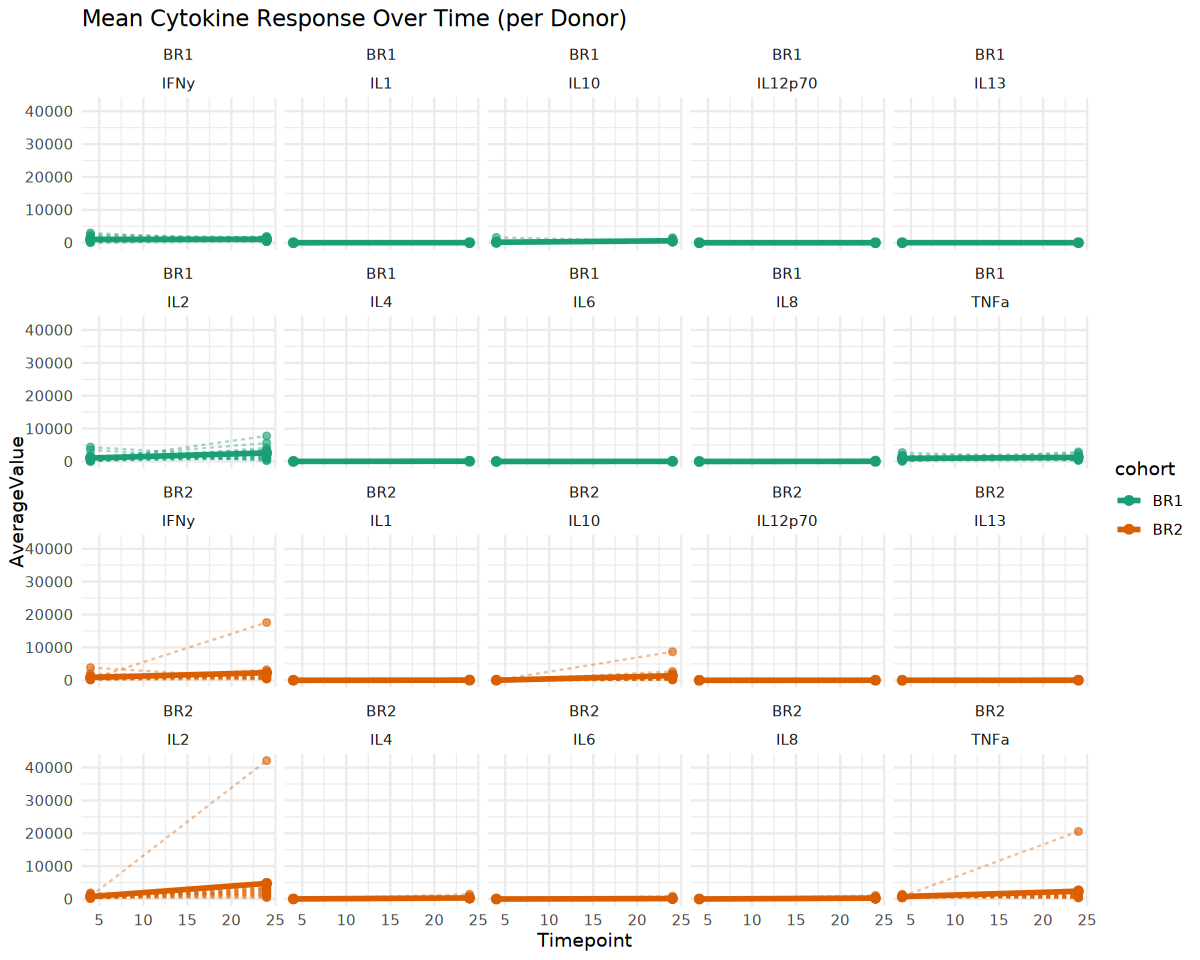

In [14]:
options(repr.plot.width = 10, repr.plot.height = 8)

# plot mean of average values across donors
ggplot(data = df_wide, 
       aes(x = timepoint, y = Value, color = cohort, group = cohort)) +
  stat_summary(aes(group = cohort), fun = mean, geom = "line", size = 1.2) +  # mean line for each cytokine
  stat_summary(aes(group = cohort), fun = mean, geom = "point", size = 2) +   # mean points for each cytokine
  geom_line(aes(group = interaction(Cytokine, donor)), linetype = "dashed", alpha = 0.4) + # individual donor avg
  geom_point(aes(group = interaction(Cytokine, donor)), alpha = 0.6) +          # individual donor avg points
  facet_wrap(~cohort+Cytokine,ncol=5) +                                                         # facets by cohort
  scale_color_manual(values = extended_colors) +                                # use extended colors
  theme_minimal() +                                                             # clean theme
  labs(title = "Mean Cytokine Response Over Time (per Donor)",
       x = "Timepoint", y = "AverageValue")                                        # axis labels and title

### all cytokine is in their own range


Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 1 row containing missing values (`geom_line()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


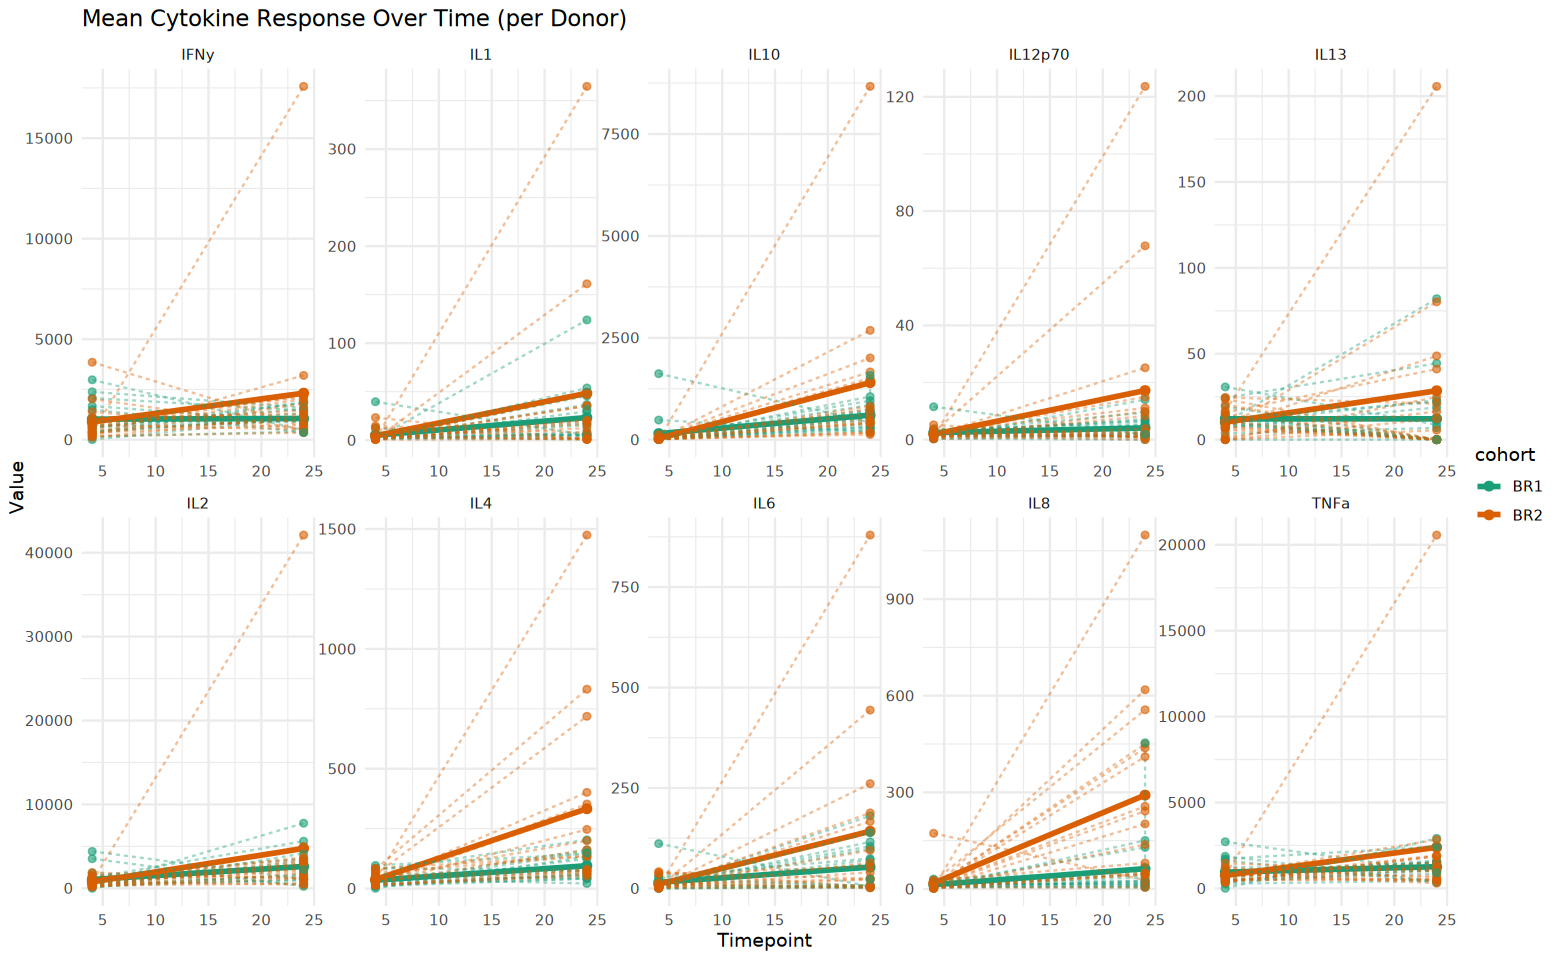

In [15]:

options(repr.plot.width = 13, repr.plot.height = 8)

# plot mean of average values across donors
ggplot(data = df_wide, 
       aes(x = timepoint, y = Value, color = cohort, group = cohort)) +
  stat_summary(aes(group = cohort), fun = mean, geom = "line", size = 1.2) +  # mean line for each cytokine
  stat_summary(aes(group = cohort), fun = mean, geom = "point", size = 2) +   # mean points for each cytokine
  geom_line(aes(group = interaction(Cytokine, donor)), linetype = "dashed", alpha = 0.4) + # individual donor avg
  geom_point(aes(group = interaction(Cytokine, donor)), alpha = 0.6) +          # individual donor avg points
  facet_wrap(~Cytokine,ncol=5,scale="free") +                                                         # facets by cohort
  scale_color_manual(values = extended_colors) +                                # use extended colors
  theme_minimal() +                                                             # clean theme
  labs(title = "Mean Cytokine Response Over Time (per Donor)",
       x = "Timepoint", y = "Value")                                    # axis labels and title

Warning message:
“Removed 24 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 24 rows containing non-finite values (`stat_compare_means()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


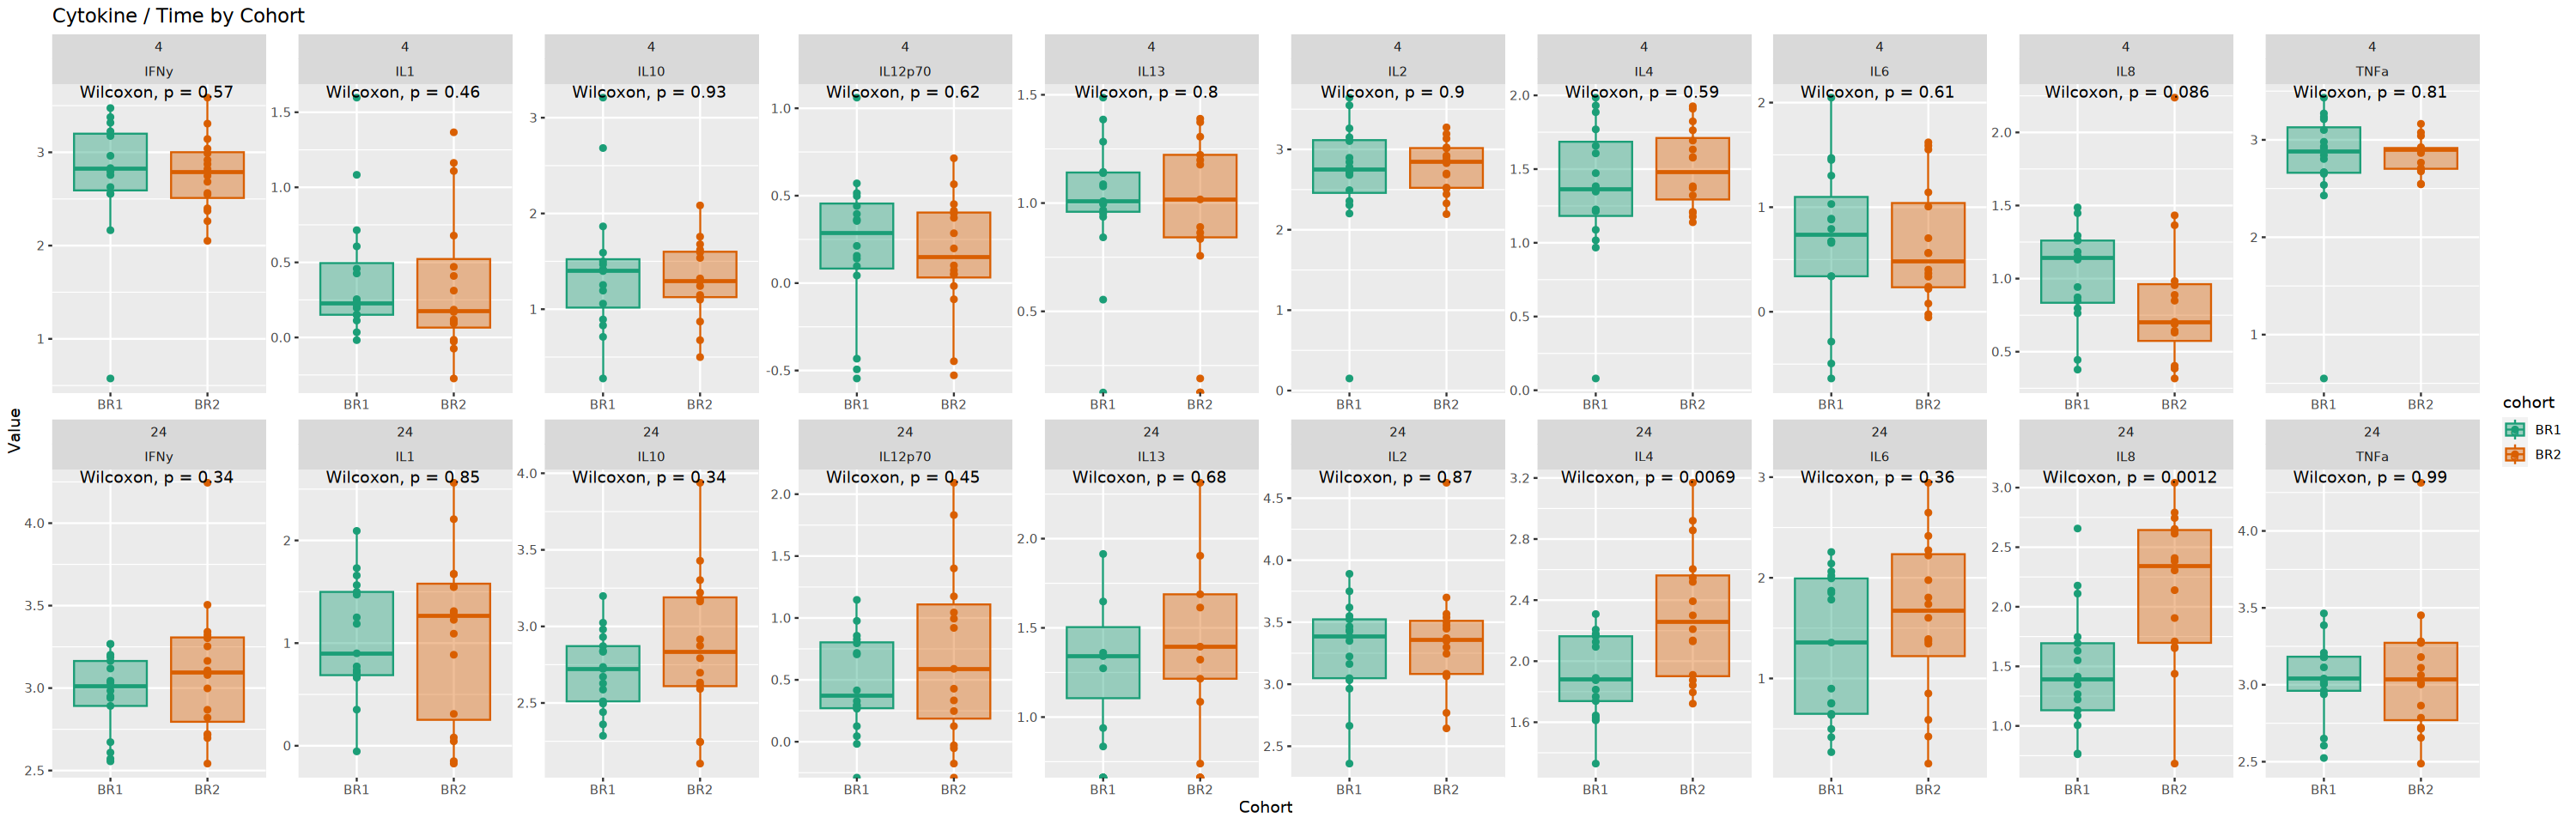

In [16]:
library(ggpubr)
options(repr.plot.width = 25, repr.plot.height = 8)

ggplot(data = df_wide, aes(x = cohort, y = log10(Value), color = cohort)) +
    geom_point() +
    geom_boxplot(aes(fill = cohort), alpha = 0.4, outlier.shape = NA, position = position_dodge(width = 0.75)) +
    facet_wrap(~ timepoint+Cytokine , scale = "free", ncol = 10) +
    scale_color_manual(values = extended_colors) +
    scale_fill_manual(values = extended_colors) +
    labs(title = "Cytokine / Time by Cohort", x = "Cohort", y = "Value") +
    stat_compare_means()

In [15]:
library(ggpubr)

In [16]:
df_wide<-df_wide %>% mutate(Age_Group=case_when(cohort=="BR1"~"Young", TRUE ~"Older"))
df_wide$Age_Group<-factor(df_wide$Age_Group,levels=c("Young","Older"))

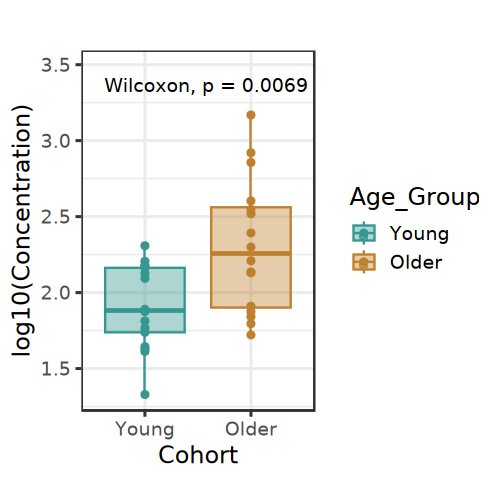

In [24]:
options(repr.plot.width = 4.1, repr.plot.height = 4)

ggplot(data = df_wide %>% filter(Cytokine=="IL4",timepoint==24), aes(x = Age_Group, y = log10(Value), color = Age_Group)) +
  geom_point() +
  geom_boxplot(aes(fill = Age_Group), alpha = 0.4, outlier.shape = NA,
               position = position_dodge(width = 0.75)) +
  labs(title = "", x = "Cohort", y = "log10(Concentration)") +
  stat_compare_means(label.y=3.32) +
  scale_fill_manual(values = c("Older" = "#bf812d", "Young" = "#35978f")) +
  scale_color_manual(values = c("Older" = "#bf812d", "Young" = "#35978f")) +
  scale_y_continuous(limits = c(NA, max(log10(df_wide$Value[df_wide$Cytokine=="IL4"])) * 1.1))+theme_bw(base_size=14)

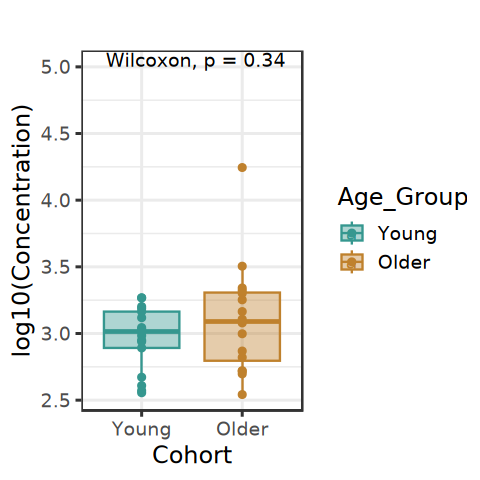

In [22]:
options(repr.plot.width = 4, repr.plot.height = 4)

ggplot(data = df_wide %>% filter(Cytokine=="IFNy",timepoint==24), aes(x = Age_Group, y = log10(Value), color = Age_Group)) +
  geom_point() +
  geom_boxplot(aes(fill = Age_Group), alpha = 0.4, outlier.shape = NA,
               position = position_dodge(width = 0.75)) +
  labs(title = "", x = "Cohort", y = "log10(Concentration)") +
  stat_compare_means(label.y=5) +
  scale_fill_manual(values = c("Older" = "#bf812d", "Young" = "#35978f")) +
  scale_color_manual(values = c("Older" = "#bf812d", "Young" = "#35978f")) +
  scale_y_continuous(limits = c(NA, max(log10(df_wide$Value[df_wide$Cytokine=="IFNy"])) * 1.1))+theme_bw(base_size=14)

In [46]:
library(dplyr)
library(ggplot2)
library(ggpubr)

summary_df <- df_wide %>% 
  filter(Cytokine == "IL4") %>% 
  group_by(Age_Group, timepoint, Cytokine) %>% 
  summarise(mean_value = mean(log10(Value)),
         sd_value = sd(log10(Value)),
         n = n(),
         se = sd_value / sqrt(n))

ggplot() +
  # add barplot with error bars from summary data
  geom_bar(data = summary_df, aes(x = Age_Group, y = mean_value, fill = Age_Group), 
           stat = "identity", position = position_dodge(width = 0.75)) +
  geom_errorbar(data = summary_df, 
                aes(x = Age_Group, ymin = mean_value - se, ymax = mean_value + se), 
                width = 0.2, position = position_dodge(width = 0.75)) +
  facet_wrap(~ timepoint + Cytokine, scale = "free_x", ncol = 10) +
  labs(title = "Cytokine / Time by Cohort", x = "Cohort", y = "log10(Concentration)") +
  scale_fill_manual(values = c("Older" = "#bf812d", "Young" = "#35978f")) +
  scale_color_manual(values = c("Older" = "#bf812d", "Young" = "#35978f")) +
  scale_y_continuous(limits = c(NA, max(summary_df$mean_value + summary_df$se) * 1.1)) +
  # add p-value from raw data using stat_compare_means
  stat_compare_means(data = df_wide %>% filter(Cytokine == "IL4"),
                     aes(x = Age_Group, y = log10(Value), group = Age_Group),
                     comparisons = list(c("Older", "Young")),
                     method = "t.test")

`summarise()` has grouped output by 'Age_Group', 'timepoint'. You can override
using the `.groups` argument.
ERROR while rich displaying an object: Error in `ggsignif::geom_signif()`:
! Problem while computing stat.
ℹ Error occurred in the 3rd layer.
Caused by error in `setup_params()`:
! Can only handle data with groups that are plotted on the x-axis

Traceback:
1. sapply(x, f, simplify = simplify)
2. lapply(X = X, FUN = FUN, ...)
3. FUN(X[[i]], ...)
4. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
5. tryCatchList(expr, classes, parentenv, handlers)
6. tryCatchOne(expr, names, parentenv, handlers[[1L]])
7. doTryCatch(return(expr), name, parentenv, handler)
8. withCallingHandlers({
 .     if (!mime %

### Graph with two timepoints and same Y axis

### IL4/IFNy RATIO

In [17]:
ratio<-df_wide %>% filter(Cytokine %in% c("IL4","IFNy")) %>% arrange(desc(Cytokine)) %>% 
group_by(donor,timepoint,cohort) %>% summarise(IL4_IFNy_Raito= first(Value)/Value ) %>% filter(IL4_IFNy_Raito!=1)

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'donor', 'timepoint', 'cohort'. You can
override using the `.groups` argument.


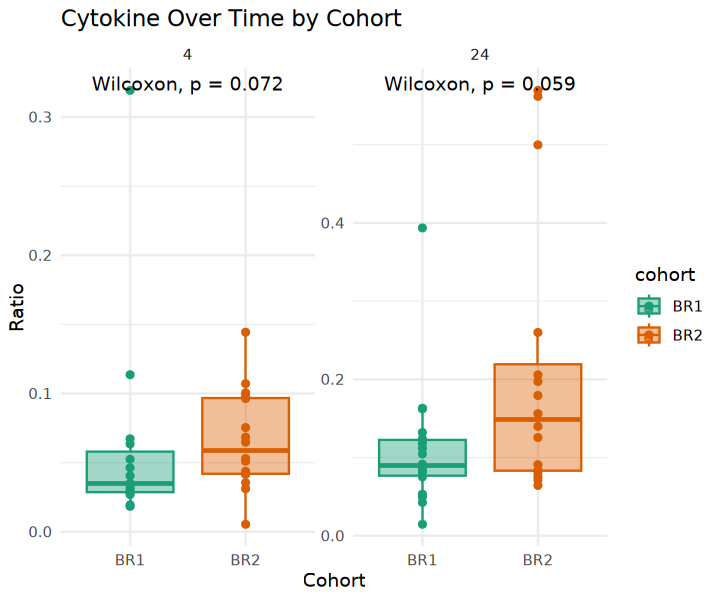

In [18]:
library(ggpubr)
options(repr.plot.width = 6, repr.plot.height = 5)

ggplot(
    data = ratio ,
    aes(x = cohort, y = IL4_IFNy_Raito, color = cohort)
) + geom_point()+
    geom_boxplot(aes(fill = cohort), alpha = 0.4, outlier.shape = NA, position = position_dodge(width = 0.75)) + 
    facet_wrap(~  timepoint,scale='free', ncol = 4) + 
    scale_color_manual(values = extended_colors) + 
    scale_fill_manual(values = extended_colors) + 
    theme_minimal() + 
    labs(
        title = "Cytokine Over Time by Cohort",
        x = "Cohort", y = "Ratio"
    ) +stat_compare_means( )

# Heatmap